In [1]:
require(dplyr)
require(ggplot2)
require(car)

Loading required package: dplyr


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union


Loading required package: ggplot2

Warning message:
“package ‘ggplot2’ was built under R version 4.1.1”
Loading required package: car

Loading required package: carData


Attaching package: ‘car’


The following object is masked from ‘package:dplyr’:

    recode




In [2]:
EIA<-read.csv('EIA.csv')

In [3]:
EIA$density<-EIA$count/EIA$area
EIA$tidestate <- as.factor(EIA$tidestate)
attach(EIA)

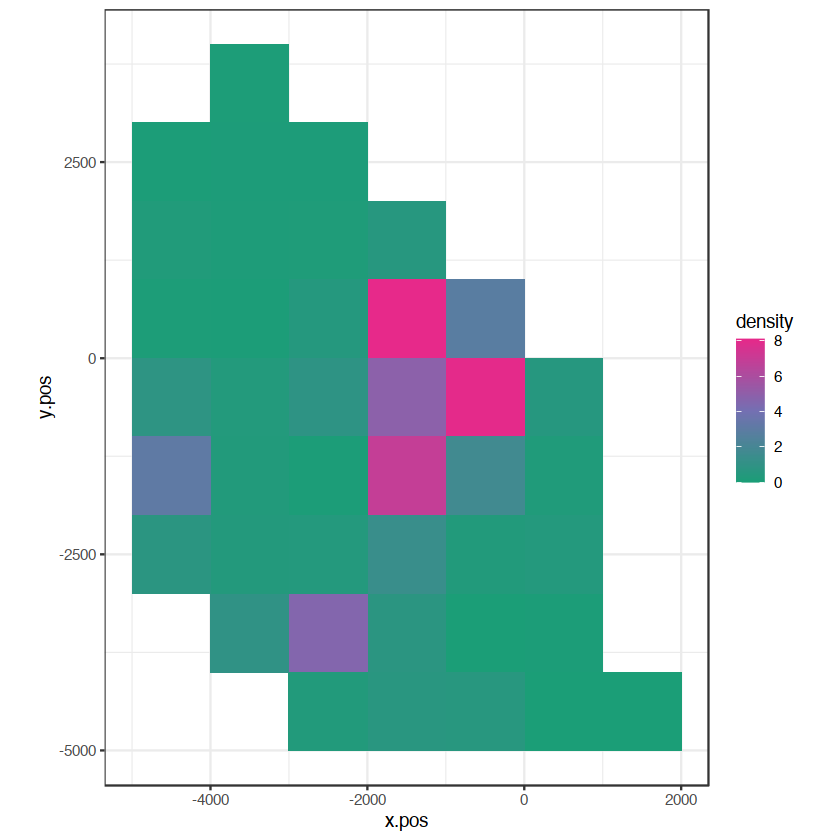

In [4]:
newdata<-group_by(EIA, GridCode)%>%
summarise(x.pos=first(x.pos), y.pos=first(y.pos), area=first(area), density=mean(density))
# pick a nice colour scheme
col<-colorRampPalette(rev(rgb(c(231,117,27),c(41,112,158),c(138,179,119),max=255)))(100)
# plot the data
p<-ggplot(newdata)
p<-p + geom_tile(aes(x=x.pos, y=y.pos, fill=density, height=1000, width=1000)) +
scale_fill_gradientn(colours=col, space="Lab", na.value="grey50", guide="colourbar")
p + theme_bw() + coord_equal()

In [5]:
fit.full<- lm(density ~ tidestate + observationhour + DayOfMonth +
MonthOfYear + impact + Year + x.pos + y.pos, data=EIA)

fit.full.fac<- lm(density ~ tidestate + observationhour + DayOfMonth +
as.factor(MonthOfYear) + impact + Year + x.pos + y.pos, data=EIA)

fit.fullfac.noimp <- lm(density ~ tidestate + observationhour + DayOfMonth +
as.factor(MonthOfYear) + Year + x.pos + Year + y.pos, data=EIA)

fit.fullfac.interac <- lm(density ~ tidestate + observationhour + DayOfMonth +
as.factor(MonthOfYear) + Year * x.pos + Year * y.pos, data=EIA)

In [6]:
vif(fit.fullfac.noimp)

,GVIF,Df,GVIF^(1/(2*Df))
tidestate,1.055829,2,1.013674
observationhour,1.123861,1,1.060123
DayOfMonth,1.166707,1,1.080142
as.factor(MonthOfYear),1.536260,11,1.019708
Year,1.131547,1,1.063742
x.pos,1.257333,1,1.121309
y.pos,1.257333,1,1.121309


In [7]:
vif(fit.full.fac)

,GVIF,Df,GVIF^(1/(2*Df))
tidestate,1.064937,2,1.015853
observationhour,1.128065,1,1.062104
DayOfMonth,1.308798,1,1.144027
as.factor(MonthOfYear),8.817205,11,1.104001
impact,42.860812,1,6.546817
Year,48.499037,1,6.964125
x.pos,1.257333,1,1.121309
y.pos,1.257333,1,1.121309


In [8]:
confint(fit.full)

,2.5 %,97.5 %
(Intercept),0.0410086532,4.1627298055
tidestateFLOOD,-0.1137616325,0.1801101308
tidestateSLACK,0.1704445976,0.4791543937
observationhour,-0.1395393810,-0.1014322391
DayOfMonth,-0.0050632725,0.0096780220
MonthOfYear,-0.0049519956,0.0450596164
impact,-1.1624912961,-0.2949129507
Year,-0.0817931458,0.3343134635
x.pos,0.0001742165,0.0002559050
y.pos,0.0000687352,0.0001307846


In this section you will use hypothesis tests and information criteria to perform backwards, stepwise and all
possible subsets selection.
Continuing with the fit.interac model, use F-tests to decide which variables appear to be statistically significant
in the model at this stage.

In [19]:
print(Anova(fit.fullfac.interac))

Anova Table (Type II tests)

Response: density
                       Sum Sq    Df  F value    Pr(>F)    
tidestate                 631     2  11.6060 9.155e-06 ***
observationhour          3966     1 145.9881 < 2.2e-16 ***
DayOfMonth                  4     1   0.1323 0.7160725    
as.factor(MonthOfYear)    973    11   3.2542 0.0001842 ***
Year                     1638     1  60.3108 8.378e-15 ***
x.pos                    2896     1 106.5796 < 2.2e-16 ***
y.pos                    1080     1  39.7476 2.933e-10 ***
Year:x.pos                111     1   4.0949 0.0430220 *  
Year:y.pos                 54     1   1.9804 0.1593564    
Residuals              754634 27777                       
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


Perform a stepwise automated selection using AIC on the model fitted to date (fit.interac). Use the step
function with direction = 'both'

In [10]:
smallest_stepwise = step(fit.fullfac.interac, direction="both")

Start:  AIC=91810.66
density ~ tidestate + observationhour + DayOfMonth + as.factor(MonthOfYear) + 
    Year * x.pos + Year * y.pos

                         Df Sum of Sq    RSS   AIC
- DayOfMonth              1       3.6 754637 91809
- Year:y.pos              1      53.8 754688 91811
<none>                                754634 91811
- Year:x.pos              1     111.2 754745 91813
- as.factor(MonthOfYear) 11     972.5 755606 91824
- tidestate               2     630.6 755264 91830
- observationhour         1    3966.1 758600 91954

Step:  AIC=91808.79
density ~ tidestate + observationhour + as.factor(MonthOfYear) + 
    Year + x.pos + y.pos + Year:x.pos + Year:y.pos

                         Df Sum of Sq    RSS   AIC
- Year:y.pos              1      53.8 754691 91809
<none>                                754637 91809
+ DayOfMonth              1       3.6 754634 91811
- Year:x.pos              1     111.2 754749 91811
- as.factor(MonthOfYear) 11     969.8 755607 91822
- tidestate   

In [11]:
summary(smallest_stepwise)


Call:
lm(formula = density ~ tidestate + observationhour + as.factor(MonthOfYear) + 
    Year + x.pos + y.pos + Year:x.pos, data = EIA)

Residuals:
    Min      1Q  Median      3Q     Max 
 -3.233  -1.572  -1.101  -0.513 136.692 

Coefficients:
                           Estimate Std. Error t value Pr(>|t|)    
(Intercept)               6.224e+00  5.284e-01  11.778  < 2e-16 ***
tidestateFLOOD            1.426e-02  7.579e-02   0.188  0.85070    
tidestateSLACK            3.389e-01  7.951e-02   4.262 2.03e-05 ***
observationhour          -1.236e-01  1.023e-02 -12.081  < 2e-16 ***
as.factor(MonthOfYear)2   4.709e-01  1.685e-01   2.796  0.00518 ** 
as.factor(MonthOfYear)3   2.499e-01  1.505e-01   1.661  0.09670 .  
as.factor(MonthOfYear)4  -1.517e-01  1.454e-01  -1.043  0.29684    
as.factor(MonthOfYear)5  -1.228e-01  1.558e-01  -0.789  0.43037    
as.factor(MonthOfYear)6  -1.829e-01  1.603e-01  -1.141  0.25396    
as.factor(MonthOfYear)7  -9.692e-02  1.709e-01  -0.567  0.57059    
as.fac

Perform a stepwise automated selection using AIC on the model fitted to date (fit.interac). Use the step
function with direction = 'both'
Now do all possible subsets selection using the dredge function and the default, AICc.
Note that the dredge function is in the MuMIn library and that you will need to run the code
options(na.action='na.fail') before using the dredge function.

In [43]:
require(MuMIn)
options(na.action='na.fail')
head(dredge(fit.fullfac.interac))

Fixed term is "(Intercept)"



,(Intercept),as.factor(MonthOfYear),DayOfMonth,observationhour,tidestate,x.pos,y.pos,Year,x.pos:Year,y.pos:Year,df,logLik,AICc,delta,weight
,<dbl>,<fct>,<dbl>,<dbl>,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<dbl>,<dbl>,<dbl>,<mdl.wght>
254,6.224034,+,NA,-0.1236031,+,0.0004887879,0.0000997599,-0.2958602,-2.684220e-05,NA,20,-85329.04,170698.1,0.0000000,0.25451129
510,6.727410,+,NA,-0.1236031,+,0.0006144382,0.0003107282,-0.3452223,-3.916371e-05,-2.068796e-05,21,-85328.05,170698.1,0.0211790,0.25183036
126,5.659889,+,NA,-0.1236031,+,0.0002150608,0.0000997599,-0.2405391,NA,NA,19,-85330.25,170698.5,0.4172559,0.20658609
256,6.193743,+,0.001409171,-0.1238157,+,0.0004887879,0.0000997599,-0.2952541,-2.684220e-05,NA,21,-85328.97,170700.0,1.8706453,0.09988530
512,6.697120,+,0.001409171,-0.1238157,+,0.0006144382,0.0003107282,-0.3446162,-3.916371e-05,-2.068796e-05,22,-85327.98,170700.0,1.8919591,0.09882648
382,5.745305,+,NA,-0.1236031,+,0.0002150608,0.0001734877,-0.2489152,NA,-7.229884e-06,20,-85330.10,170700.2,2.1158406,0.08836049


Covariates selected: MonthOfYear, observationHour, tidestate, xpos, ypos, year, xposyear

 Using BIC for stepwise selection does not change the covariates selected in the final
model. 

In [21]:
bic_stepwise_model = step(fit.fullfac.interac, direction="both", k=log(nrow(EIA)))

Start:  AIC=91983.55
density ~ tidestate + observationhour + DayOfMonth + as.factor(MonthOfYear) + 
    Year * x.pos + Year * y.pos

                         Df Sum of Sq    RSS   AIC
- as.factor(MonthOfYear) 11     972.5 755606 91907
- DayOfMonth              1       3.6 754637 91973
- Year:y.pos              1      53.8 754688 91975
- Year:x.pos              1     111.2 754745 91977
<none>                                754634 91984
- tidestate               2     630.6 755264 91986
- observationhour         1    3966.1 758600 92119

Step:  AIC=91906.79
density ~ tidestate + observationhour + DayOfMonth + Year + x.pos + 
    y.pos + Year:x.pos + Year:y.pos

                         Df Sum of Sq    RSS   AIC
- DayOfMonth              1       0.9 755607 91897
- Year:y.pos              1      53.8 755660 91899
- Year:x.pos              1     111.2 755717 91901
- tidestate               2     539.6 756146 91906
<none>                                755606 91907
+ as.factor(MonthOfYear) 1

In [22]:
summary(bic_stepwise_model)


Call:
lm(formula = density ~ observationhour + Year + x.pos + y.pos, 
    data = EIA)

Residuals:
    Min      1Q  Median      3Q     Max 
 -3.102  -1.552  -1.106  -0.563 136.805 

Coefficients:
                  Estimate Std. Error t value Pr(>|t|)    
(Intercept)      5.371e+00  3.247e-01  16.544  < 2e-16 ***
observationhour -1.194e-01  9.674e-03 -12.342  < 2e-16 ***
Year            -2.055e-01  2.907e-02  -7.069 1.60e-12 ***
x.pos            2.151e-04  2.085e-05  10.316  < 2e-16 ***
y.pos            9.976e-05  1.584e-05   6.300 3.03e-10 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 5.216 on 27793 degrees of freedom
Multiple R-squared:  0.01108,	Adjusted R-squared:  0.01094 
F-statistic: 77.85 on 4 and 27793 DF,  p-value: < 2.2e-16


In [39]:
print(Anova(fit.fullfac.interac))
fit.fullfac.interac_n1 <- lm(density ~ tidestate + observationhour +
as.factor(MonthOfYear) + Year * x.pos + Year * y.pos, data=EIA)
print(Anova(fit.fullfac.interac_n1))
fit.fullfac.interac_n2 <- lm(density ~ tidestate + observationhour +
as.factor(MonthOfYear) + Year * x.pos, data=EIA)
print(Anova(fit.fullfac.interac_n2))
fit.fullfac.interac_n3 <- lm(density ~ tidestate + observationhour +
as.factor(MonthOfYear), data=EIA)
print(Anova(fit.fullfac.interac_n3))

Anova Table (Type II tests)

Response: density
                       Sum Sq    Df  F value    Pr(>F)    
tidestate                 631     2  11.6060 9.155e-06 ***
observationhour          3966     1 145.9881 < 2.2e-16 ***
DayOfMonth                  4     1   0.1323 0.7160725    
as.factor(MonthOfYear)    973    11   3.2542 0.0001842 ***
Year                     1638     1  60.3108 8.378e-15 ***
x.pos                    2896     1 106.5796 < 2.2e-16 ***
y.pos                    1080     1  39.7476 2.933e-10 ***
Year:x.pos                111     1   4.0949 0.0430220 *  
Year:y.pos                 54     1   1.9804 0.1593564    
Residuals              754634 27777                       
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1
Anova Table (Type II tests)

Response: density
                       Sum Sq    Df  F value    Pr(>F)    
tidestate                 627     2  11.5477 9.705e-06 ***
observationhour          3965     1 145.9666 < 2.2e-16 ***
as.factor(Mon

In [49]:
round(summary(smallest_stepwise)$sigma^2, 2)

[1] 27.17

In [48]:
summary(smallest_stepwise)


Call:
lm(formula = density ~ tidestate + observationhour + as.factor(MonthOfYear) + 
    Year + x.pos + y.pos + Year:x.pos, data = EIA)

Residuals:
    Min      1Q  Median      3Q     Max 
 -3.233  -1.572  -1.101  -0.513 136.692 

Coefficients:
                           Estimate Std. Error t value Pr(>|t|)    
(Intercept)               6.224e+00  5.284e-01  11.778  < 2e-16 ***
tidestateFLOOD            1.426e-02  7.579e-02   0.188  0.85070    
tidestateSLACK            3.389e-01  7.951e-02   4.262 2.03e-05 ***
observationhour          -1.236e-01  1.023e-02 -12.081  < 2e-16 ***
as.factor(MonthOfYear)2   4.709e-01  1.685e-01   2.796  0.00518 ** 
as.factor(MonthOfYear)3   2.499e-01  1.505e-01   1.661  0.09670 .  
as.factor(MonthOfYear)4  -1.517e-01  1.454e-01  -1.043  0.29684    
as.factor(MonthOfYear)5  -1.228e-01  1.558e-01  -0.789  0.43037    
as.factor(MonthOfYear)6  -1.829e-01  1.603e-01  -1.141  0.25396    
as.factor(MonthOfYear)7  -9.692e-02  1.709e-01  -0.567  0.57059    
as.fac

Non-constant Variance Score Test 
Variance formula: ~ fitted.values 
Chisquare = 8176.476, Df = 1, p = < 2.22e-16

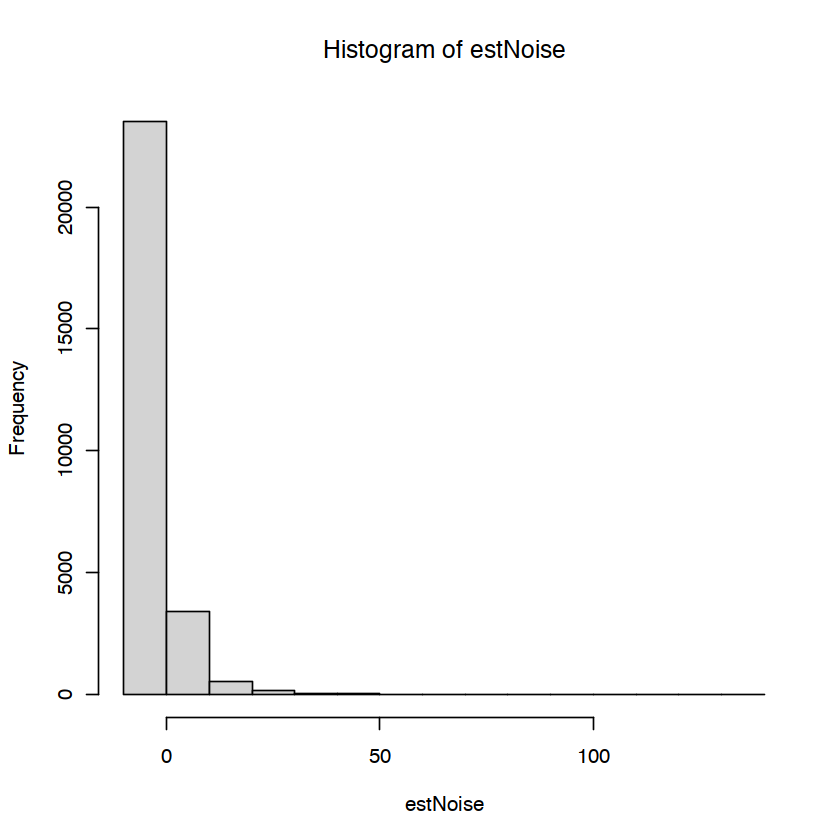


	Shapiro-Wilk normality test

data:  sample(estNoise, size = 3000, replace = FALSE)
W = 0.36131, p-value < 2.2e-16


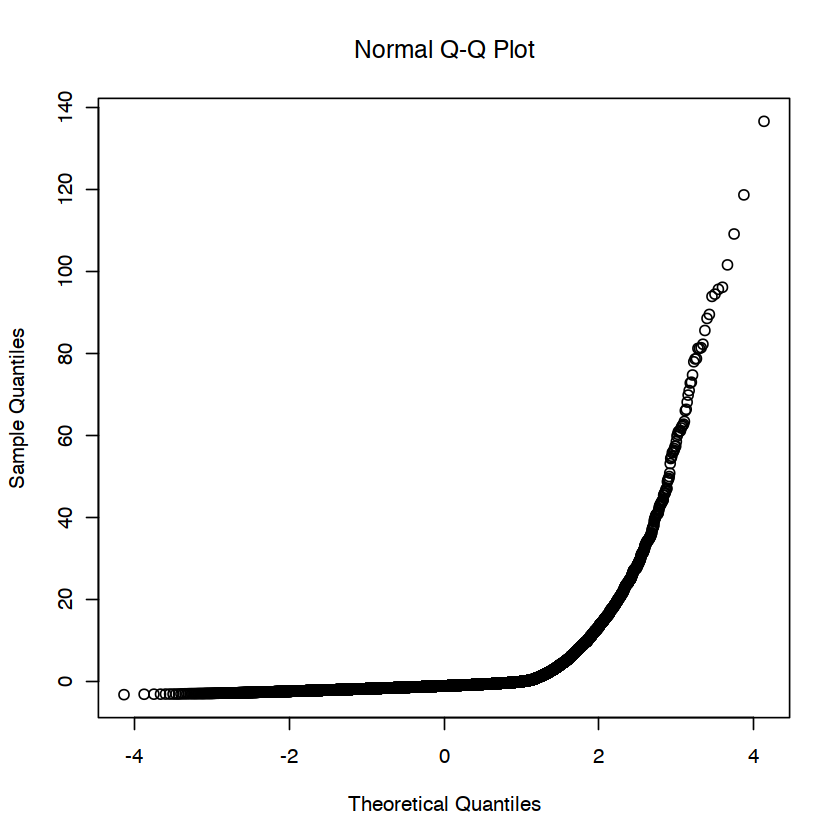

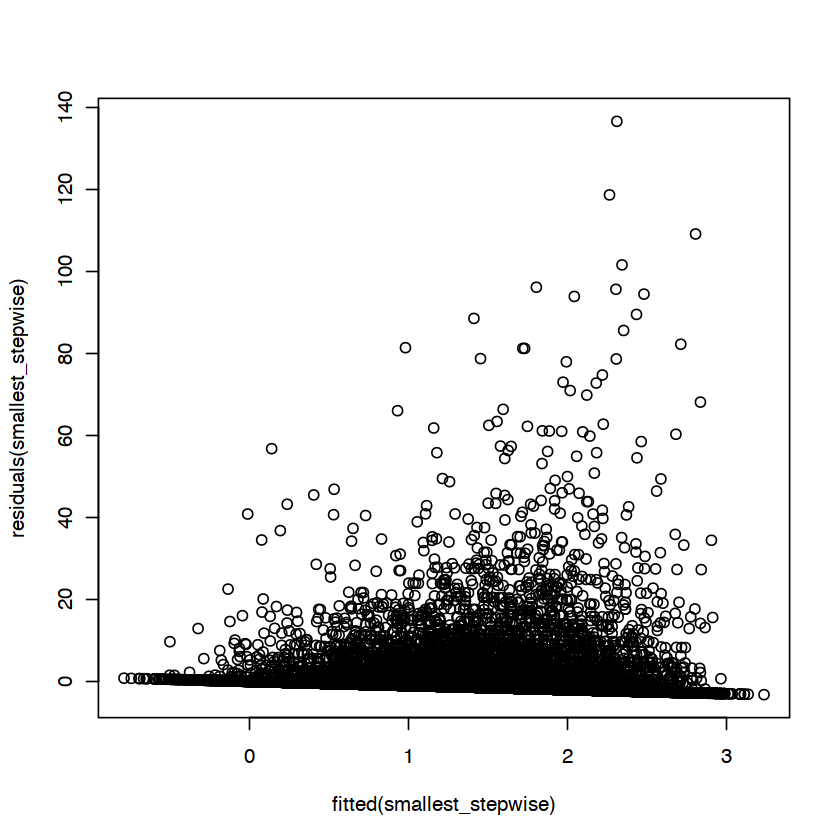

In [55]:
ncvTest(smallest_stepwise)
estNoise <- residuals(smallest_stepwise)
# Histogram of residuals
hist(estNoise)
qqnorm(estNoise)
shapiro.test(sample(estNoise, size=3000, replace=FALSE))
plot (fitted (smallest_stepwise), residuals (smallest_stepwise))

### Generalised least squares modelling

For this section we will use the square root of density as the response and investigate using the impact variable
instead of year.
Fit two GLS models with an exponential mean-variance relationship and one with a power based mean-variance
relationship.

In [57]:
require(nlme)
EIA$sqrtdensity<-sqrt(density)
fit.gls<-gls(sqrtdensity ~ tidestate + observationhour + impact + x.pos + y.pos +
MonthOfYear + impact:x.pos + impact:y.pos, data = EIA, method='ML')

Loading required package: nlme


Attaching package: ‘nlme’


The following object is masked from ‘package:dplyr’:

    collapse




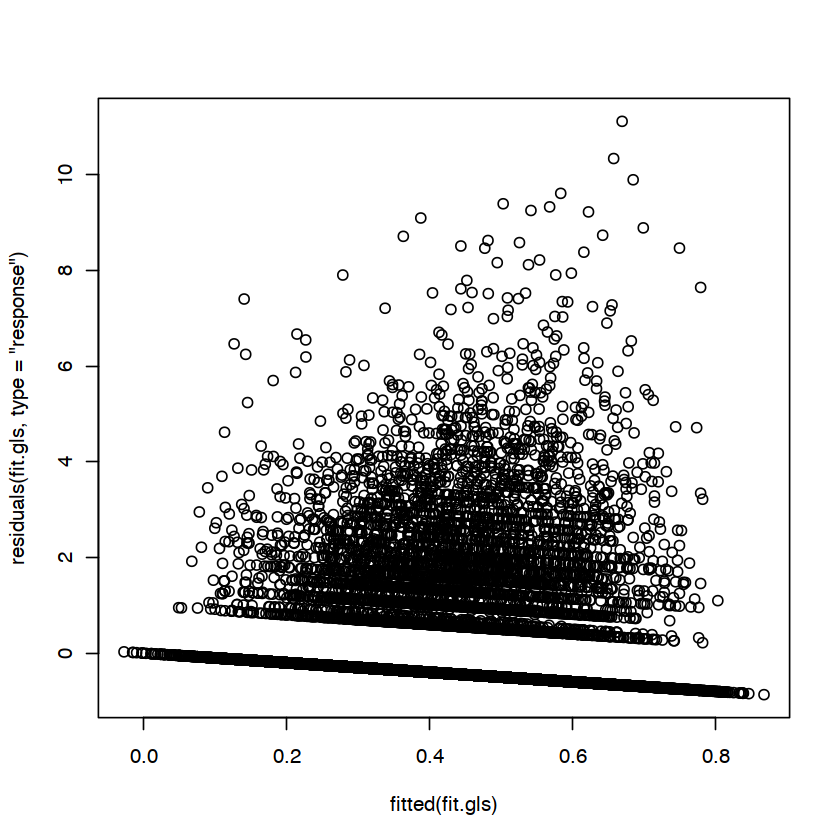

In [71]:
plot(fitted(fit.gls), residuals(fit.gls, type='response'))
cut.fit<-cut(fitted(fit.gls), breaks=quantile(fitted(fit.gls), probs=seq(0,1,length=20)))
means1<- tapply(fitted(fit.gls), cut.fit, mean)
variances1 <- tapply(residuals(fit.gls, type="response"), cut.fit, var)

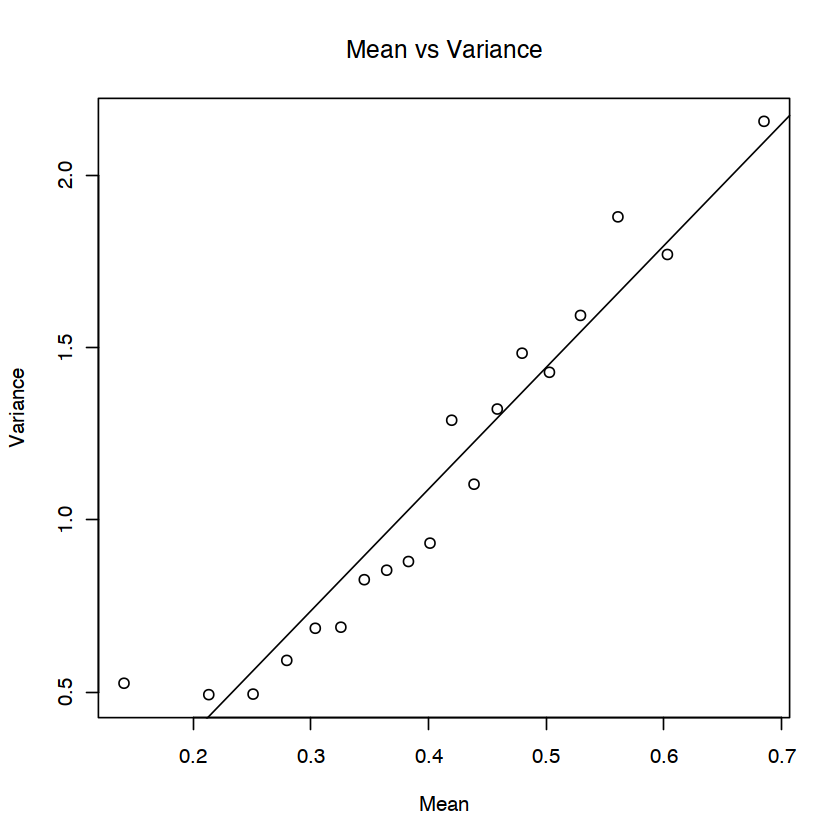

In [76]:
plot(x=means1, y=variances1, abline(lm(variances1 ~ means1)), xlab="Mean", ylab="Variance", main="Mean vs Variance")
